In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def train_df(tr_path):
    data = []
    for tumor_type in os.listdir(tr_path):
        tumor_dir = os.path.join(tr_path, tumor_type)
        if os.path.isdir(tumor_dir):
            images_dir = os.path.join(tumor_dir, 'images')
            labels_dir = os.path.join(tumor_dir, 'labels')
            
            if os.path.isdir(images_dir) and os.path.isdir(labels_dir):
                for image_file in os.listdir(images_dir):
                    image_path = os.path.join(images_dir, image_file)
                    label_file = os.path.splitext(image_file)[0] + '.txt'
                    label_path = os.path.join(labels_dir, label_file)
                    
                    data.append({'Image Path': image_path, 'Label Path': label_path, 'Tumor Type': tumor_type})

    tr_df = pd.DataFrame(data)
    return tr_df


In [5]:
def test_df(tr_path):
    data = []
    for tumor_type in os.listdir(tr_path):
        tumor_dir = os.path.join(tr_path, tumor_type)
        if os.path.isdir(tumor_dir):
            images_dir = os.path.join(tumor_dir, 'images')
            labels_dir = os.path.join(tumor_dir, 'labels')
            
            if os.path.isdir(images_dir) and os.path.isdir(labels_dir):
                for image_file in os.listdir(images_dir):
                    image_path = os.path.join(images_dir, image_file)
                    label_file = os.path.splitext(image_file)[0] + '.txt'
                    label_path = os.path.join(labels_dir, label_file)
                    
                    data.append({'Image Path': image_path, 'Label Path': label_path, 'Tumor Type': tumor_type})

    ts_df = pd.DataFrame(data)
    return ts_df

In [6]:
tr_df = train_df('MRI-Brain-Tumor-Bounding-Boxes/Train')
tr_df

,Image Path,Label Path,Tumor Type
0,MRI-Brain-Tumor-Bounding-Boxes/Train\Glioma\im...,MRI-Brain-Tumor-Bounding-Boxes/Train\Glioma\la...,Glioma
1,MRI-Brain-Tumor-Bounding-Boxes/Train\Glioma\im...,MRI-Brain-Tumor-Bounding-Boxes/Train\Glioma\la...,Glioma
2,MRI-Brain-Tumor-Bounding-Boxes/Train\Glioma\im...,MRI-Brain-Tumor-Bounding-Boxes/Train\Glioma\la...,Glioma
3,MRI-Brain-Tumor-Bounding-Boxes/Train\Glioma\im...,MRI-Brain-Tumor-Bounding-Boxes/Train\Glioma\la...,Glioma
4,MRI-Brain-Tumor-Bounding-Boxes/Train\Glioma\im...,MRI-Brain-Tumor-Bounding-Boxes/Train\Glioma\la...,Glioma
...,...,...,...
4732,MRI-Brain-Tumor-Bounding-Boxes/Train\Pituitary...,MRI-Brain-Tumor-Bounding-Boxes/Train\Pituitary...,Pituitary
4733,MRI-Brain-Tumor-Bounding-Boxes/Train\Pituitary...,MRI-Brain-Tumor-Bounding-Boxes/Train\Pituitary...,Pituitary
4734,MRI-Brain-Tumor-Bounding-Boxes/Train\Pituitary...,MRI-Brain-Tumor-Bounding-Boxes/Train\Pituitary...,Pituitary
4735,MRI-Brain-Tumor-Bounding-Boxes/Train\Pituitary...,MRI-Brain-Tumor-Bounding-Boxes/Train\Pituitary...,Pituitary


In [7]:
ts_df = test_df('MRI-Brain-Tumor-Bounding-Boxes/Val')
ts_df

,Image Path,Label Path,Tumor Type
0,MRI-Brain-Tumor-Bounding-Boxes/Val\Glioma\imag...,MRI-Brain-Tumor-Bounding-Boxes/Val\Glioma\labe...,Glioma
1,MRI-Brain-Tumor-Bounding-Boxes/Val\Glioma\imag...,MRI-Brain-Tumor-Bounding-Boxes/Val\Glioma\labe...,Glioma
2,MRI-Brain-Tumor-Bounding-Boxes/Val\Glioma\imag...,MRI-Brain-Tumor-Bounding-Boxes/Val\Glioma\labe...,Glioma
3,MRI-Brain-Tumor-Bounding-Boxes/Val\Glioma\imag...,MRI-Brain-Tumor-Bounding-Boxes/Val\Glioma\labe...,Glioma
4,MRI-Brain-Tumor-Bounding-Boxes/Val\Glioma\imag...,MRI-Brain-Tumor-Bounding-Boxes/Val\Glioma\labe...,Glioma
...,...,...,...
507,MRI-Brain-Tumor-Bounding-Boxes/Val\Pituitary\i...,MRI-Brain-Tumor-Bounding-Boxes/Val\Pituitary\l...,Pituitary
508,MRI-Brain-Tumor-Bounding-Boxes/Val\Pituitary\i...,MRI-Brain-Tumor-Bounding-Boxes/Val\Pituitary\l...,Pituitary
509,MRI-Brain-Tumor-Bounding-Boxes/Val\Pituitary\i...,MRI-Brain-Tumor-Bounding-Boxes/Val\Pituitary\l...,Pituitary
510,MRI-Brain-Tumor-Bounding-Boxes/Val\Pituitary\i...,MRI-Brain-Tumor-Bounding-Boxes/Val\Pituitary\l...,Pituitary


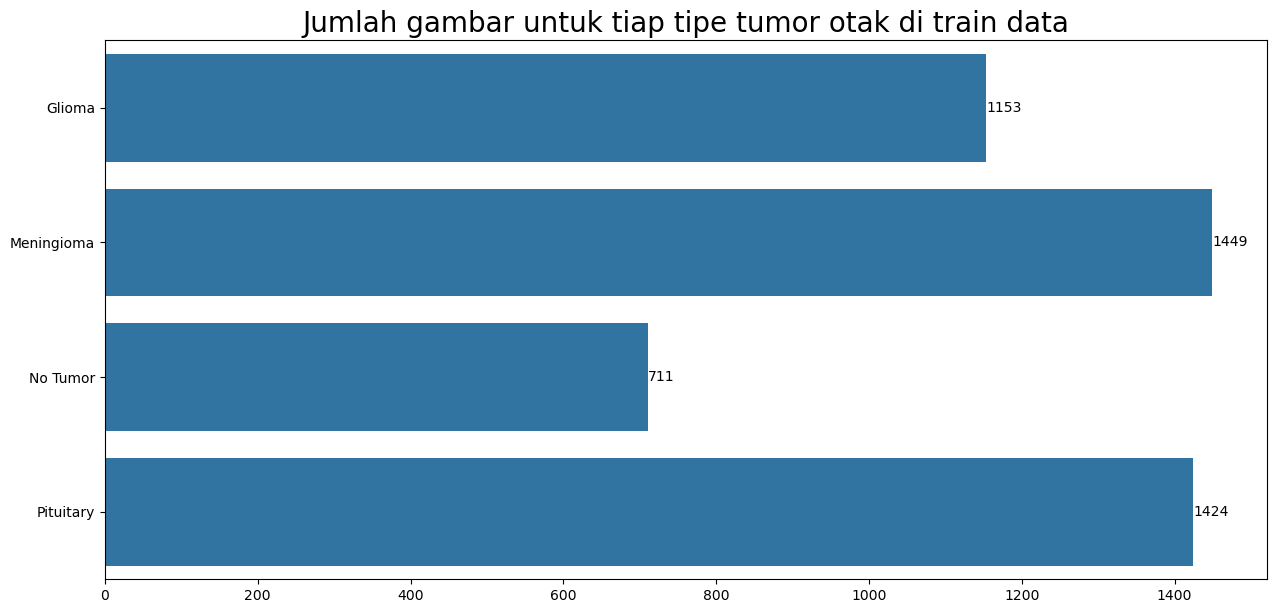

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Tumor Type'])

plt.xlabel('')
plt.ylabel('')
plt.title('Jumlah gambar untuk tiap tipe tumor otak di train data', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

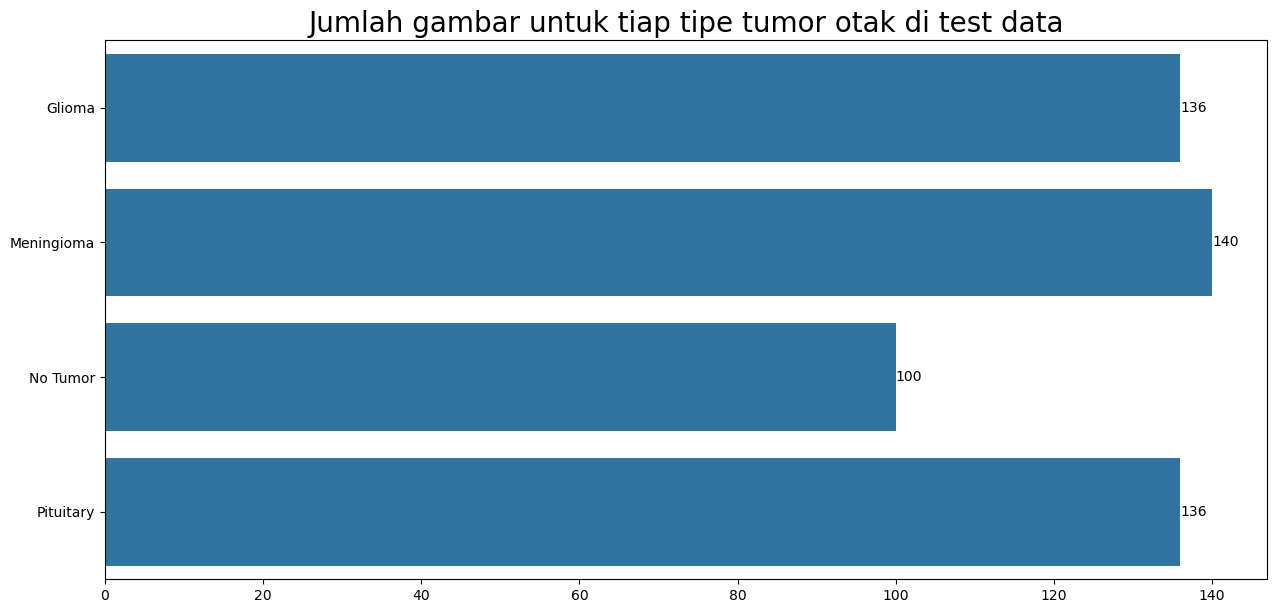

In [9]:
plt.figure(figsize=(15,7))

unique_classes = tr_df['Tumor Type'].unique()
palette = sns.color_palette("husl", len(unique_classes))

ax = sns.countplot(data=ts_df , y=ts_df['Tumor Type'])

plt.xlabel('')
plt.ylabel('')
plt.title('Jumlah gambar untuk tiap tipe tumor otak di test data', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Image Path',
                                  y_col='Tumor Type', batch_size=batch_size,
                                  target_size=img_size)


ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Image Path',
                                  y_col='Tumor Type', batch_size=16,
                                  target_size=img_size, shuffle=True)

Found 4737 validated image filenames belonging to 4 classes.
Found 512 validated image filenames belonging to 4 classes.


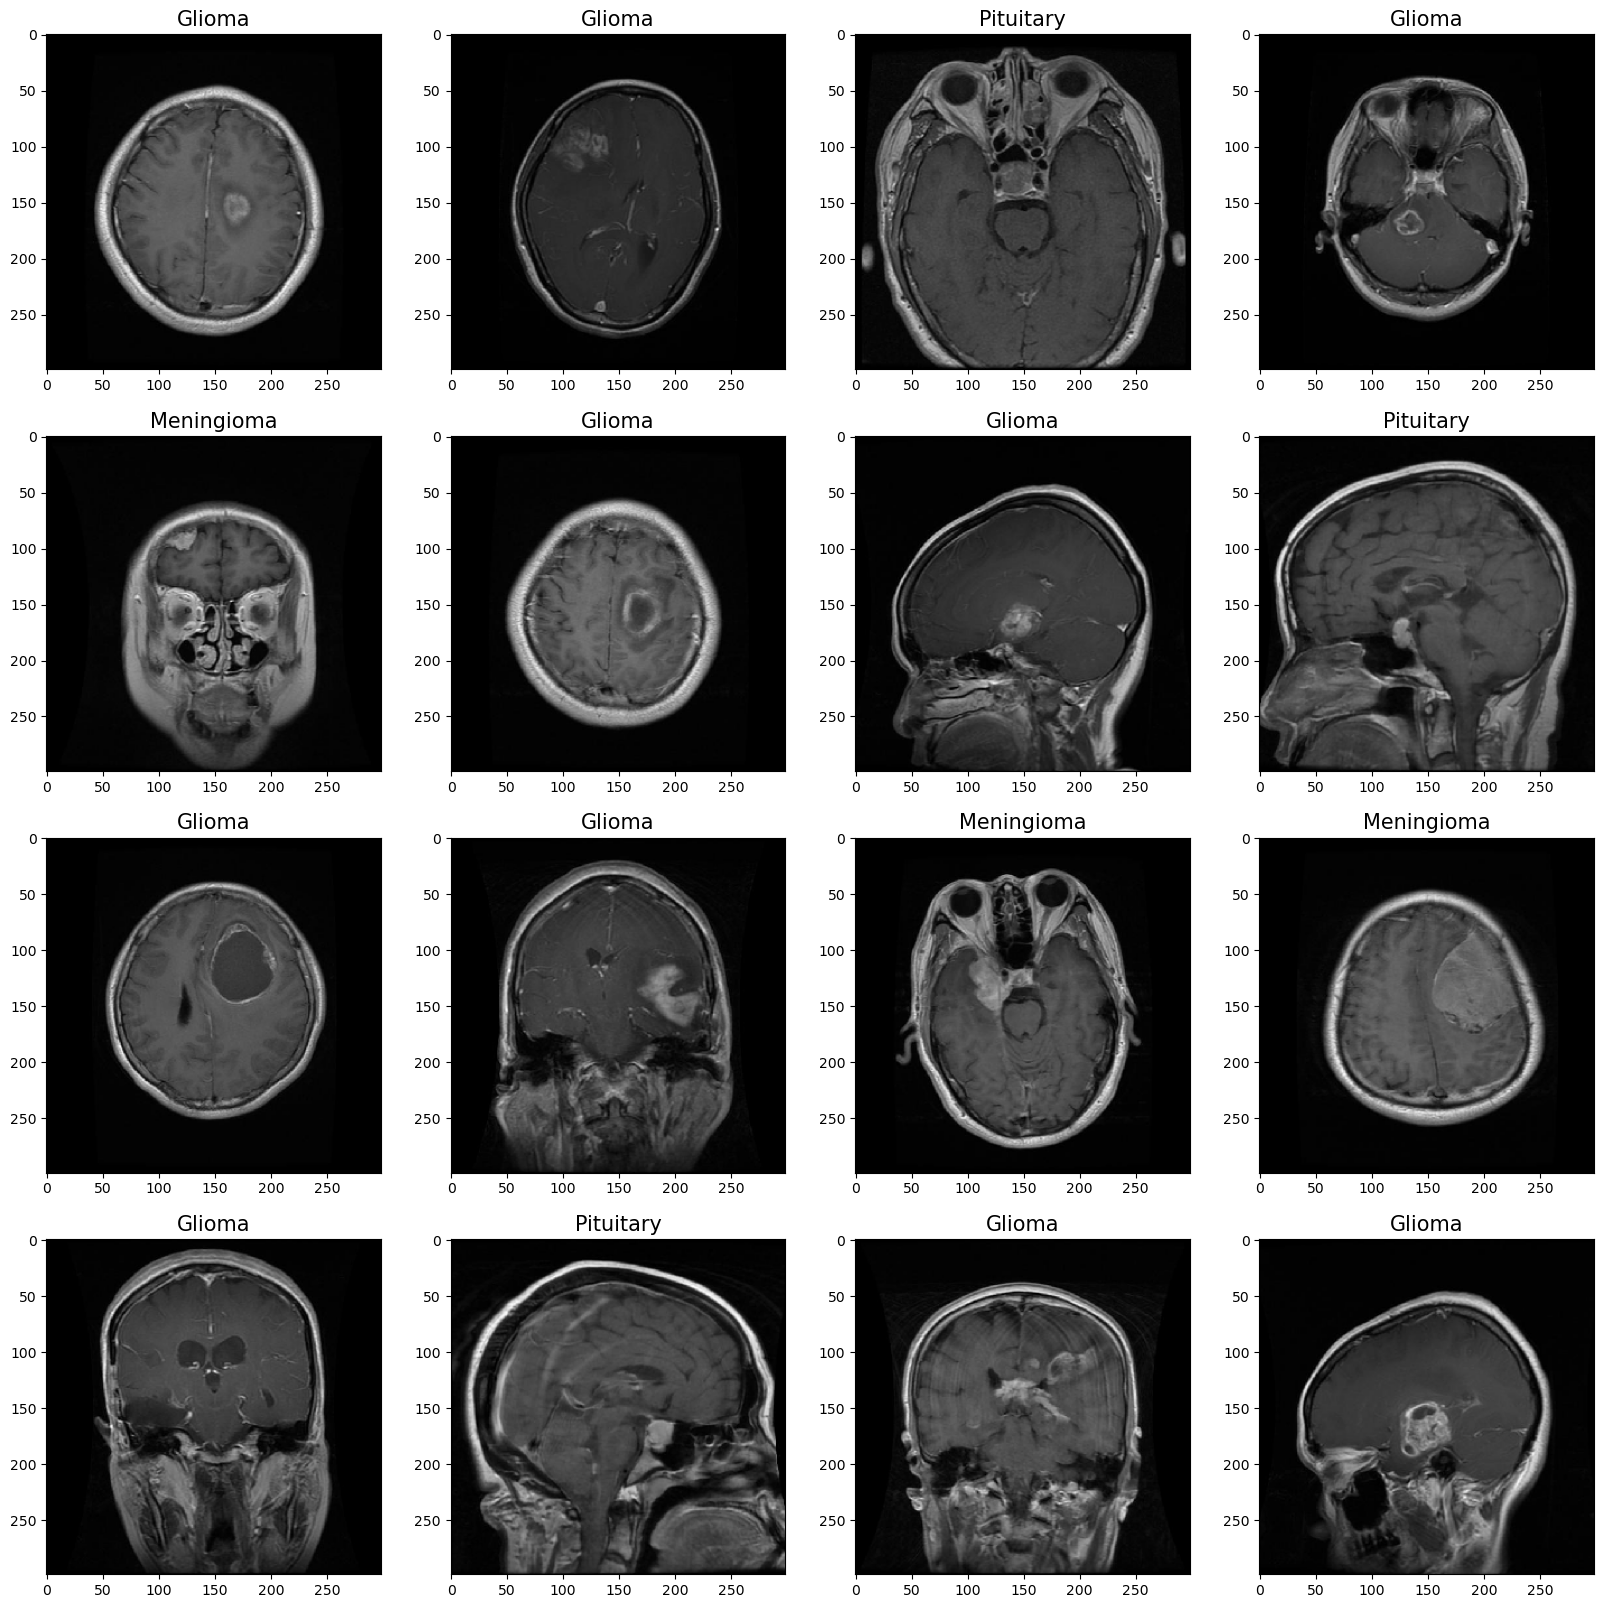

In [11]:
classes = list(tr_gen.class_indices.keys())

images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

In [20]:
dataset_yaml_content = """
path: C:/Users/lenov/TugasML/Brain-Tumor-Detection-main/MRI-Brain-Tumor-Bounding-Boxes

train: Train
val: Val

nc: 4
names: ['Glioma','Meningioma', 'No Tumor', 'Pituitary']
"""

with open('dataset.yaml', 'w') as f:
    f.write(dataset_yaml_content)

In [22]:
!pip install ultralytics

In [23]:
from ultralytics import YOLO

yolo_model = YOLO('yolov8n.pt')

In [26]:
yolo_model.train(data='dataset.yaml', epochs=20, imgsz=299, project='DetectTumor', name='yolo_train')

Ultralytics 8.3.107  Python-3.12.7 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=299, save=True, save_period=-1, cache=False, device=None, workers=8, project=DetectTumor, name=yolo_train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

100%|██████████| 755k/755k [00:00<00:00, 1.74MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning C:\Users\lenov\TugasML\Brain-Tumor-Detection-main\MRI-Brain-Tumor-Bounding-Boxes\Train\Glioma\labels... 4737 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4737/4737 [00:07<00:00, 657.91it/s]


train: New cache created: C:\Users\lenov\TugasML\Brain-Tumor-Detection-main\MRI-Brain-Tumor-Bounding-Boxes\Train\Glioma\labels.cache


val: Scanning C:\Users\lenov\TugasML\Brain-Tumor-Detection-main\MRI-Brain-Tumor-Bounding-Boxes\Val\Glioma\labels... 510 images, 3 backgrounds, 0 corrupt: 100%|██████████| 512/512 [00:00<00:00, 667.43it/s]

val: New cache created: C:\Users\lenov\TugasML\Brain-Tumor-Detection-main\MRI-Brain-Tumor-Bounding-Boxes\Val\Glioma\labels.cache
Plotting labels to DetectTumor\yolo_train5\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to DetectTumor\yolo_train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.083      1.947      1.086          0        320: 100%|██████████| 297/297 [04:43<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        512        554      0.786      0.736      0.806      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.097       1.19      1.086          2        320: 100%|██████████| 297/297 [04:38<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]

                   all        512        554      0.851      0.805      0.853      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.095      1.047      1.086          1        320: 100%|██████████| 297/297 [04:42<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.32it/s]

                   all        512        554      0.867      0.736      0.858      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.064     0.9397      1.069          1        320: 100%|██████████| 297/297 [04:52<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.31it/s]

                   all        512        554      0.867      0.837        0.9      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.018     0.8532      1.056          5        320: 100%|██████████| 297/297 [04:52<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.32it/s]

                   all        512        554      0.827      0.817      0.888      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G     0.9854     0.8154      1.039          1        320: 100%|██████████| 297/297 [04:53<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.31it/s]

                   all        512        554        0.8      0.828      0.872      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G     0.9821      0.761      1.039          1        320: 100%|██████████| 297/297 [04:52<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]

                   all        512        554      0.877      0.857      0.917      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      0.947     0.7307      1.024          0        320: 100%|██████████| 297/297 [04:53<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]

                   all        512        554      0.903        0.9      0.927      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.9491     0.6973      1.028          2        320: 100%|██████████| 297/297 [04:45<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        512        554      0.914      0.896      0.935       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.9152     0.6625      1.015          2        320: 100%|██████████| 297/297 [04:32<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.39it/s]

                   all        512        554      0.911      0.888      0.932      0.728


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.8682     0.5975     0.9846          1        320: 100%|██████████| 297/297 [04:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.42it/s]

                   all        512        554      0.931      0.885       0.94      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.8509     0.5737     0.9792          1        320: 100%|██████████| 297/297 [04:30<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        512        554      0.928      0.907      0.943       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.8333     0.5378      0.969          1        320: 100%|██████████| 297/297 [04:29<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.42it/s]

                   all        512        554      0.937       0.92      0.945      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.8148     0.5188     0.9629          1        320: 100%|██████████| 297/297 [04:26<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.41it/s]

                   all        512        554      0.935      0.906      0.951      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/20         0G     0.7965     0.4991      0.953          1        320: 100%|██████████| 297/297 [04:22<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.41it/s]

                   all        512        554      0.928      0.907      0.949      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/20         0G     0.7879      0.478     0.9486          1        320: 100%|██████████| 297/297 [04:23<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.41it/s]

                   all        512        554      0.923      0.915      0.951      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/20         0G     0.7717     0.4716     0.9432          1        320: 100%|██████████| 297/297 [04:35<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]

                   all        512        554      0.958      0.918      0.956      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/20         0G     0.7678     0.4503     0.9415          1        320: 100%|██████████| 297/297 [04:30<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.42it/s]

                   all        512        554      0.939      0.922      0.957       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.7467     0.4359     0.9387          1        320: 100%|██████████| 297/297 [04:20<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.43it/s]

                   all        512        554      0.935       0.93      0.956      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      0.735     0.4192     0.9316          1        320: 100%|██████████| 297/297 [04:21<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.44it/s]

                   all        512        554      0.942      0.919      0.957      0.773



20 epochs completed in 1.604 hours.
Optimizer stripped from DetectTumor\yolo_train5\weights\last.pt, 6.2MB
Optimizer stripped from DetectTumor\yolo_train5\weights\best.pt, 6.2MB

Validating DetectTumor\yolo_train5\weights\best.pt...
Ultralytics 8.3.107  Python-3.12.7 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.63it/s]


                   all        512        554      0.935       0.93      0.956      0.778
                Glioma        135        153      0.892      0.856      0.915      0.715
            Meningioma        140        142      0.967      0.965      0.984      0.835
              No Tumor         98         98       0.98      0.992      0.992      0.841
             Pituitary        154        161      0.902      0.907      0.936       0.72
Speed: 0.2ms preprocess, 16.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to DetectTumor\yolo_train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001B7974CB470>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [2]:
import gradio as gr
from ultralytics import YOLO
from PIL import Image
import numpy as np
import cv2

model = YOLO("DetectTumor/yolo_train5/weights/best.pt")
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

def predict_and_draw(img: Image.Image):
    results = model.predict(img, imgsz=299, conf=0.25)
    result = results[0]
    boxes = result.boxes

    if boxes is None or len(boxes) == 0:
        return img, "No tumor detected."

    img_np = np.array(img).copy()
    report_lines = []

    all_no_tumor = all(int(box.cls[0]) == 2 for box in boxes)

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        class_id = int(box.cls[0])
        conf = float(box.conf[0])
        label = f"{class_names[class_id]} ({conf*100:.2f}%)"
        color = (0, 255, 0) if class_id != 2 else (0, 0, 255)

        cv2.rectangle(img_np, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img_np, label, (x1 + 5, y1 + 20), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.6, color, 2)

        if class_id == 2:
            report_lines.append(label)
        else:
            report_lines.append(f"{label} - Box: ({x1}, {y1}), ({x2}, {y2})")

    if all_no_tumor:
        report_text = f"No Tumor detected ({report_lines[0].split('(')[-1]}"
    else:
        report_text = f"{len(boxes)} tumor(s) detected:\n" + "\n".join(f"{i+1}. {r}" for i, r in enumerate(report_lines))

    return Image.fromarray(img_np), report_text

gr.Interface(
    fn=predict_and_draw,
    inputs=gr.Image(type="pil", label="Upload MRI Image"),
    outputs=[
        gr.Image(type="pil", label="Detection Result"),
        gr.Text(label="Detection Report")
    ],
    title="🧠 Brain Tumor Detection",
    description="Detect and localize brain tumors from MRI scans using a custom-trained YOLOv8 model.",
    allow_flagging="never",
    theme="soft"
).launch(share=True)


C:\Users\lenov\anaconda3\Lib\site-packages\gradio\interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://b1909013a61029f3d0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
